## Inicializando

In [316]:
# Importando bibliotecas necessárias.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

from scipy.stats import norm
import matplotlib.pyplot as plt

In [317]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [318]:
tabela = pd.read_csv('/content/drive/MyDrive/Classroom/ICA20.2/abalone.csv',sep=';',decimal=',')
tabela = tabela.drop(columns=['Unnamed: 0'])

# Questão 00


In [ ]:
# Para exibir as 5 linhas principais (sem parâmetro = 5 linhas)
tabela.head(6)

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [ ]:
# Para exibir as 6 linhas inferiores (sem parâmetro = 5 linhas)
tabela.tail(6) 

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
4171,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [ ]:
# Verificando o tipo de dados
tabela.dtypes

Type              object
LongestShell     float64
Diameter         float64
Height           float64
WholeWeight      float64
ShuckedWeight    float64
VisceraWeight    float64
ShellWeight      float64
Rings              int64
dtype: object

In [ ]:
# Número total de linhas e colunas
tabela.shape

(4177, 9)

In [ ]:
# Usado para contar o número de linhas antes de remover os dados
tabela.count ()

Type             4177
LongestShell     4177
Diameter         4177
Height           4177
WholeWeight      4177
ShuckedWeight    4177
VisceraWeight    4177
ShellWeight      4177
Rings            4177
dtype: int64

In [ ]:
# Encontrar os valores nulos. 
print (tabela.isnull (). sum ())

Type             0
LongestShell     0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64


Como nâo foram identificados valores ausentes, não existe a necessidade de removê-los. 


In [ ]:
#Visão geral dos dados
tabela.describe()

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Abaixo iremos identificar os valores discrepantes (outliers) do dataframe:

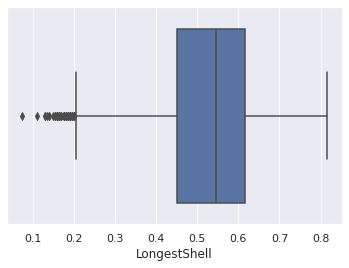

In [ ]:
#Identificar valores discrepantes
sns.boxplot(x=tabela['LongestShell'])

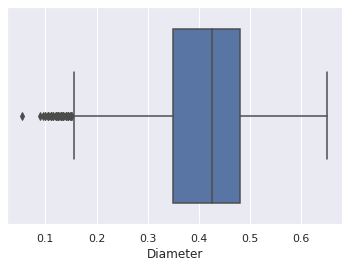

In [ ]:
#IQR Score Technique - Identificar e remover valores discrepantes
sns.boxplot(x=tabela['Diameter'])

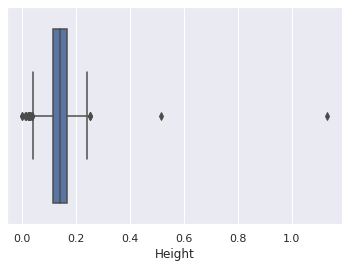

In [ ]:
#IQR Score Technique - Identificar e remover valores discrepantes
sns.boxplot(x=tabela['Height'])

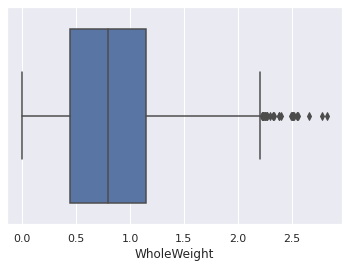

In [ ]:
#IQR Score Technique - Identificar e remover valores discrepantes
sns.boxplot(x=tabela['WholeWeight'])

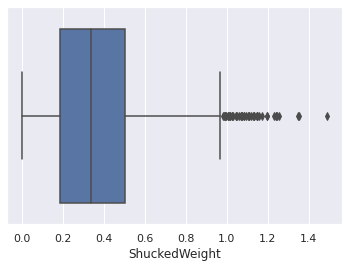

In [ ]:
#IQR Score Technique - Identificar e remover valores discrepantes
sns.boxplot(x=tabela['ShuckedWeight'])

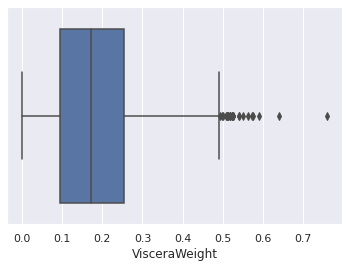

In [ ]:
#IQR Score Technique - Identificar e remover valores discrepantes
sns.boxplot(x=tabela['VisceraWeight'])

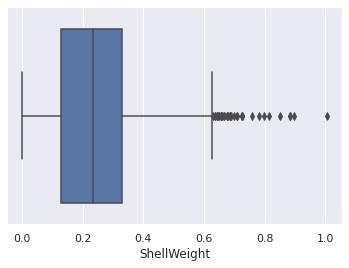

In [ ]:
#IQR Score Technique - Identificar e remover valores discrepantes
sns.boxplot(x=tabela['ShellWeight'])

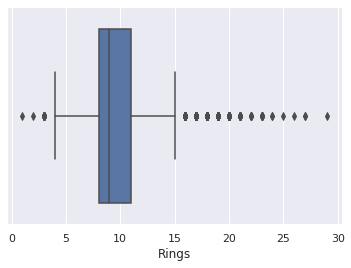

In [ ]:
#IQR Score Technique - Identificar e remover valores discrepantes
sns.boxplot(x=tabela['Rings'])

Após identificados os outliers iremos removê-los, de forma que o dataframe final tenha valores que possam ser usados para a criação de um modelo mais preciso de regressão linear:

In [ ]:
#Primeiramente iremos remover os outliers da coluna "LongestShell"
#z_scores = scipy.stats.zscore(tabela)

Q1 = tabela['LongestShell'].quantile(0.25)
Q3 = tabela['LongestShell'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (tabela['LongestShell'] >= Q1 - 1.5 * IQR) & (tabela['LongestShell'] <= Q3 + 1.5 *IQR)
#O novo dataframe será armazenado em tabela1
tabela1 = tabela.loc[filter]
tabela1


,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


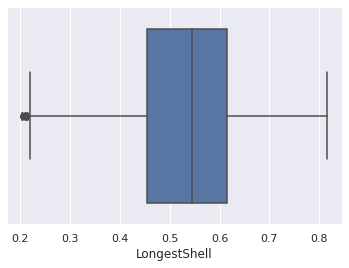

In [ ]:
#Abaixo o dataframe sem outliers na coluna "LongestShell"
sns.boxplot(x=tabela1['LongestShell'])

In [ ]:
# Removendo os outliers da coluna "Diameter"

Q1 = tabela1['Diameter'].quantile(0.25)
Q3 = tabela1['Diameter'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (tabela1['Diameter'] >= Q1 - 1.5 * IQR) & (tabela1['Diameter'] <= Q3 + 1.5 *IQR)
#O novo dataframe será armazenado em tabela2
tabela2 = tabela1.loc[filter]
tabela2

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


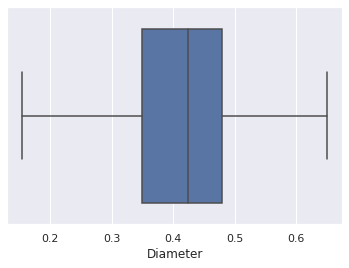

In [ ]:
#Abaixo o dataframe sem outliers na coluna "Diameter"
sns.boxplot(x=tabela2['Diameter'])

In [ ]:
# Removendo os outliers da coluna "Height"

Q1 = tabela2['Height'].quantile(0.25)
Q3 = tabela2['Height'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (tabela2['Height'] >= Q1 - 1.5 * IQR) & (tabela2['Height'] <= Q3 + 1.5 *IQR)
#O novo dataframe será armazenado em tabela3
tabela3 = tabela2.loc[filter]
tabela3

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


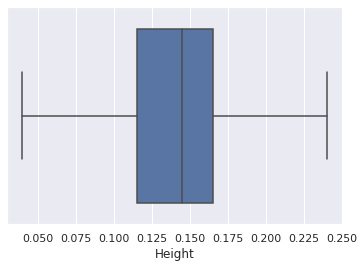

In [ ]:
#Abaixo o dataframe sem outliers na coluna "Height"
sns.boxplot(x=tabela3['Height'])

In [ ]:
# Removendo os outliers da coluna "WholeWeight"

Q1 = tabela3['WholeWeight'].quantile(0.25)
Q3 = tabela3['WholeWeight'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (tabela3['WholeWeight'] >= Q1 - 1.5 * IQR) & (tabela3['WholeWeight'] <= Q3 + 1.5 *IQR)
#O novo dataframe será armazenado em tabela4
tabela4 = tabela3.loc[filter]
tabela4

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


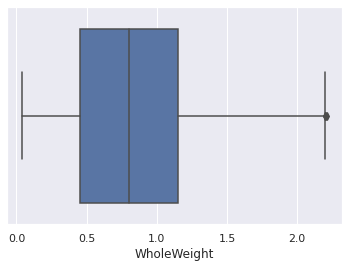

In [ ]:
#Abaixo o dataframe sem outliers na coluna "WholeWeight"
sns.boxplot(x=tabela4['WholeWeight'])

In [ ]:
# Removendo os outliers da coluna "ShuckedWeight"

Q1 = tabela4['ShuckedWeight'].quantile(0.25)
Q3 = tabela4['ShuckedWeight'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (tabela4['ShuckedWeight'] >= Q1 - 1.5 * IQR) & (tabela3['ShuckedWeight'] <= Q3 + 1.5 *IQR)
#O novo dataframe será armazenado em tabela5
tabela5 = tabela4.loc[filter]
tabela5

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


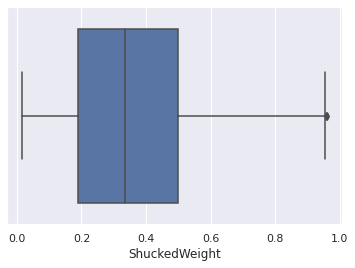

In [ ]:
#Abaixo o dataframe sem outliers na coluna "ShuckedWeight"
sns.boxplot(x=tabela5['ShuckedWeight'])

In [ ]:
# Removendo os outliers da coluna "VisceraWeight"

Q1 = tabela5['VisceraWeight'].quantile(0.25)
Q3 = tabela5['VisceraWeight'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (tabela5['VisceraWeight'] >= Q1 - 1.5 * IQR) & (tabela5['VisceraWeight'] <= Q3 + 1.5 *IQR)
#O novo dataframe será armazenado em tabela6
tabela6 = tabela5.loc[filter]
tabela6

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


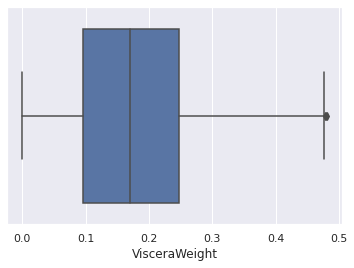

In [ ]:
#Abaixo o dataframe sem outliers na coluna "VisceraWeight"
sns.boxplot(x=tabela6['VisceraWeight'])

In [ ]:
# Removendo os outliers da coluna "ShellWeight"

Q1 = tabela6['ShellWeight'].quantile(0.25)
Q3 = tabela6['ShellWeight'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (tabela6['ShellWeight'] >= Q1 - 1.5 * IQR) & (tabela6['ShellWeight'] <= Q3 + 1.5 *IQR)
#O novo dataframe será armazenado em tabela7
tabela7 = tabela6.loc[filter]
tabela7

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


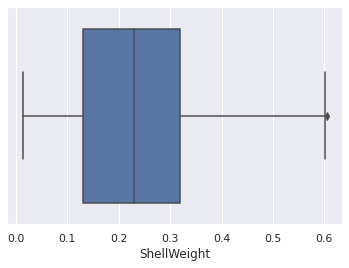

In [ ]:
#Abaixo o dataframe sem outliers na coluna "ShellWeight"
sns.boxplot(x=tabela7['ShellWeight'])

In [ ]:
# Removendo os outliers da coluna "Rings"

Q1 = tabela7['Rings'].quantile(0.25)
Q3 = tabela7['Rings'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (tabela7['Rings'] >= Q1 - 1.5 * IQR) & (tabela7['Rings'] <= Q3 + 1.5 *IQR)
#O novo dataframe será armazenado em tabela8
tabela8 = tabela7.loc[filter]
tabela8

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


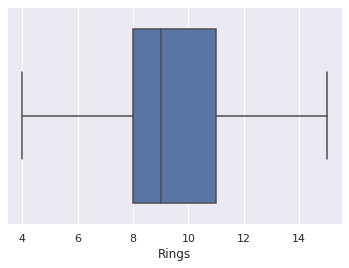

In [ ]:
#Abaixo o dataframe sem outliers na coluna "Rings"
sns.boxplot(x=tabela8['Rings'])

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
LongestShell,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
WholeWeight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
ShuckedWeight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
VisceraWeight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
ShellWeight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


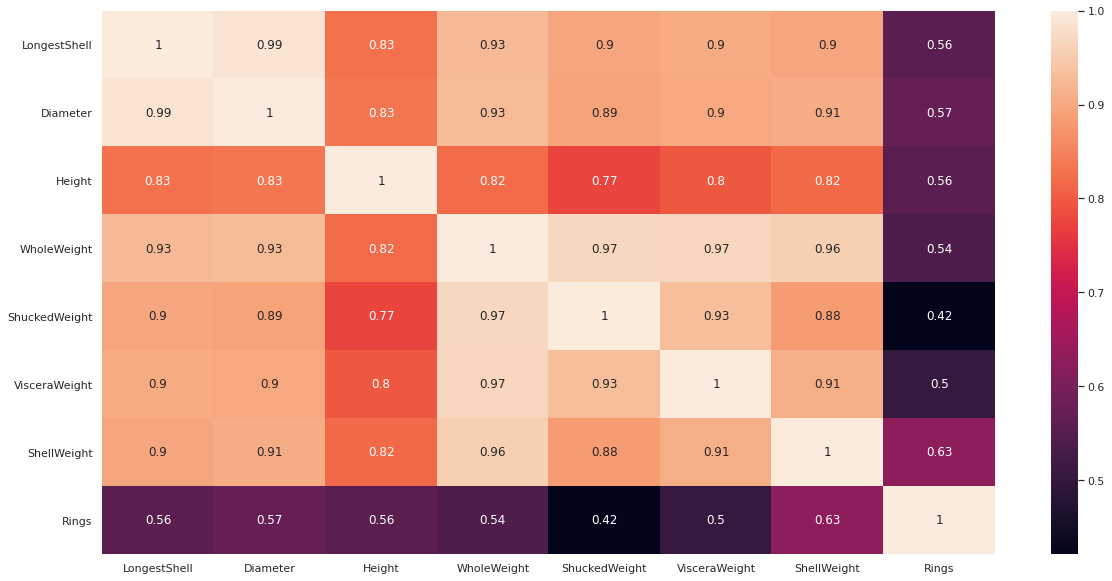

In [ ]:
# Encontrar as relações entre as variáveis.
plt.figure(figsize=(20,10))
c= tabela.corr()
sns.heatmap(c,annot=True)
c

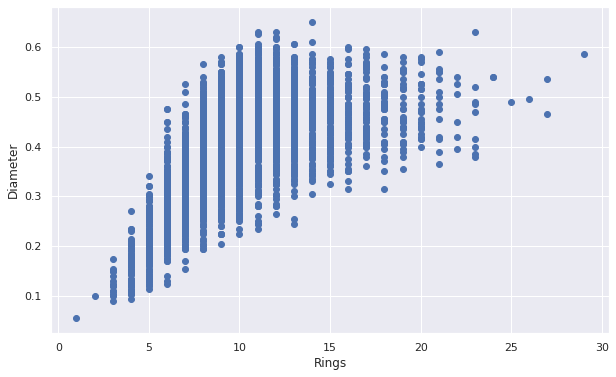

In [ ]:
# Traçando um gráfico de dispersão
fig, ax = plt.subplots (figsize = (10,6)) 
ax.scatter (tabela['Rings'], tabela['Diameter']) 
ax.set_xlabel ('Rings') 
ax.set_ylabel ('Diameter') 
plt.show ()

#Questão 01



Testamos datasets tratados de diferentes formas:
1. Dataset com outliers e tipos M, F e I (4177 linhas de dados)
* MSE = 4.90
* RMSE = 2.142
* R^2 = 0.53

2. Dataset sem outliers e tipos M, F e I (3773 linhas de dados)
* MSE = 2.73
* RMSE = 1.653
* R^2 = 0.49

3. Dataset sem outliers e tipos M e F (2512 linhas de dados)
* MSE = 3.00
* RMSE = 1.73
* R^2 = 0.29

Devido aos resultados apresentandos, resolvemos usar o modelo 2 (Dataset sem outliers e tipos M, F e I), como apresentado abaixo:

In [ ]:
data = pd.DataFrame({'type': ['M', 'F', 'I']})
data

,type
0,M
1,F
2,I


In [ ]:
#Como os valores de 'Type' (M, F e I) não podem ser utilizados na regressão linear, por serem string, fazemos a substituição dessas strings
#por valores númericos

tabela8['Type'].replace({'M':0, 'F':1, 'I':2}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
tabela8.head(20)

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
8,0,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
10,1,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.210,14
11,0,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.135,10
12,0,0.490,0.380,0.135,0.5415,0.2175,0.0950,0.190,11


In [ ]:
# Definimos as entradas eliminando a coluna "Rings" (axis=1: define que Rings é uma coluna)
X = tabela8.drop('Rings', axis=1)
X


,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [ ]:
#Rings será nossa saída/outcome
Y = tabela8.Rings
Y

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
#Fazemos a divisão do dataset entre treino e teste, sendo 80% do dataset para o treino e 20% para o teste.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X_train.head()


,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
3636,2,0.390,0.290,0.090,0.2745,0.1350,0.0455,0.078
3078,1,0.695,0.535,0.200,1.5855,0.6670,0.3340,0.471
2193,2,0.215,0.170,0.055,0.0605,0.0205,0.0140,0.020
2888,2,0.510,0.400,0.125,0.5935,0.2390,0.1300,0.204
1509,1,0.645,0.505,0.165,1.3180,0.5500,0.3015,0.335


In [ ]:
#Criamos inicialmente um modelo de regressão linear:
model = linear_model.LinearRegression()
#E então treinamos o modelo usando os dados de treino:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Aqui fazemos predições usando os dados de treino:
Y_pred_train = model.predict(X_train)

In [ ]:
#Abaixo mostramos os valores de RMSE e de R² resultados do uso dos dados de treino:
import math
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Root Mean squared error (RMSE): %.3f'
      % math.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Coefficients: [ -0.36889992  -0.06024118  10.00199283  15.10687605   4.12844144
 -12.70238601  -3.19904506   6.92500669]
Intercept: 3.8402759534221778
Mean squared error (MSE): 2.73
Root Mean squared error (RMSE): 1.653
Coefficient of determination (R^2): 0.49


In [ ]:
#Aqui fazemos predições usando os dados de teste:

Y_pred_test = model.predict(X_test)

In [ ]:
#Abaixo mostramos os valores de RMSE e de R² resultados do uso dos dados de teste:
import math
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test))
print('Root Mean squared error (RMSE): %.3f'
      % math.sqrt(mean_squared_error(Y_test, Y_pred_test)))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Coefficients: [ -0.36889992  -0.06024118  10.00199283  15.10687605   4.12844144
 -12.70238601  -3.19904506   6.92500669]
Intercept: 3.8402759534221778
Mean squared error (MSE): 2.53
Root Mean squared error (RMSE): 1.592
Coefficient of determination (R^2): 0.54


Podemos comentar que para um bom modelo de regressão linear devemos ter valores de RMSE o mais próximo de 0 possível e valores de R² o mais próximo de 1 possível.
<br>

Quanto mais próximo de 1 o valor de R² melhor o modelo de regressão linear.
R² varia de 0 a 1 e se temos um valor de R² de 0,5 concluímos que o modelo de regressão linear pode prever 50% do que está no mundo real.
Quanto ao RMSE, quanto mais próximo de 0 o valor do RMSE, melhor o modelo de regressão linear. RMSE é uma medida do erro médio do resultado do modelo de regressão linear em relação ao mundo real. Por exemplo, se o RMSE é 1,6 concluímos que o modelo está errando em 1,6 anéis a mais ou a menos do valor do mundo real.
<br>

Nosso modelo de regressão linear apresentou os valores de:
<br>

Para os dados de treino: 
* RMSE: 1,653
* R²: 0,49 (49%)

<br>

Para os dados de teste:

* RMSE: 1,592
* R²: 0,54 (54%)

<br>

Os valores obtidos para os dados de treino e os dados de teste são bem próximos, com os valores obtidos com os dados de teste sendo um pouco melhores.


In [ ]:
#Agora iremos testar nosso dataset usando o método cross validation:

#Abaixo padronizamos os dados para fazer o cross validation:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Padronizamos o set de treino e o set de teste
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform (X_test)

In [ ]:
#Iremos usar 10 kfolds e ver os valores de RMSE e R² para cada um deles:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
kf = KFold(n_splits=10)
resultadosr2 = []
resultadosrmse = []
cont = 1
for train_index, test_index in kf.split(X_train):
  X_train_cross, X_test_cross = X_train[train_index], X_train[test_index]
  y_train_cross, y_test_cross = Y_train.iloc[train_index], Y_train.iloc[test_index]
 
  model = LinearRegression()
  model.fit(X_train_cross, y_train_cross)

  y_pred = model.predict(X_test_cross)
  r2 = r2_score(y_test_cross, y_pred)
  resultadosr2.append(r2)
  print('KFold {}'.format(cont))
  print("Valor do R2: {}".format(r2))
  RMSE = mean_squared_error(y_test_cross, y_pred,squared=False)
  resultadosrmse.a   ppend(RMSE)
  print("Valor do RMSE: {}\n".format(RMSE))
  cont+=1

  

SyntaxError: ignored

Como podemos ver acima, os valores de RMSE e R² continuaram próximos aos encontrados anteriormente. Iremos então fazer a média deles e obter também um valor próximo do obtido anteriormente:


In [ ]:
mediaR2 = np.mean(resultadosr2)
mediaRMSE = np.mean(resultadosrmse)
print("Média do R2: {}\nMédia do RMSE: {}".format(mediaR2, mediaRMSE))

Média do R2: 0.4874520362670432
Média do RMSE: 1.6583861030765141


In [ ]:
#Abaixo vemos qual o resultado com o uso dos dados de teste para essa versão do modelo de regressão linear:
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
r2 = r2_score(Y_test, y_pred)
RMSE = mean_squared_error(Y_test, y_pred,squared=False)
print('R2: {}\nRMSE: {}\n'.format(r2, RMSE))

R2: 0.5398930152430355
RMSE: 1.5920600935181664



A seguir, iremos plotar alguns gráficos para demonstrar a relação entre o número de anéis preditos pelo nosso modelo e o valor real do número de anéis.

In [ ]:
def scatter_y(true_y, predicted_y):
    """Scatter-plot the prediro vs real número de anéis
    
    Plots:
       * predito vs real número de anéis
       * perfect agreement line
       * +2/-2 number dotted lines

    Returns the root mean square of the error
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(true_y, predicted_y, '.k')
    
    ax.plot([0, 30], [0, 30], '--k')
    ax.plot([0, 30], [2, 32], ':k')
    ax.plot([2, 32], [0, 30], ':k')
    
    rms = (true_y - predicted_y).std()
    
    ax.text(25, 3,
            "Root Mean Square Error = %.2g" % rms,
            ha='right', va='bottom')

    ax.set_xlim(0, 30)
    ax.set_ylim(0, 30)
    
    ax.set_xlabel('Valor real do número de anéis')
    ax.set_ylabel('Número de anéis predito')
    
    return rms
    #Fonte: https://operational-machine-learning-pipeline.workshop.aws/assets/Model_Framing_Example.html

Plotando gráficos para melhor visualização do RMSE com os dados de treino e de teste

Text(0.5, 1.0, 'Plot com os dados de treino:')

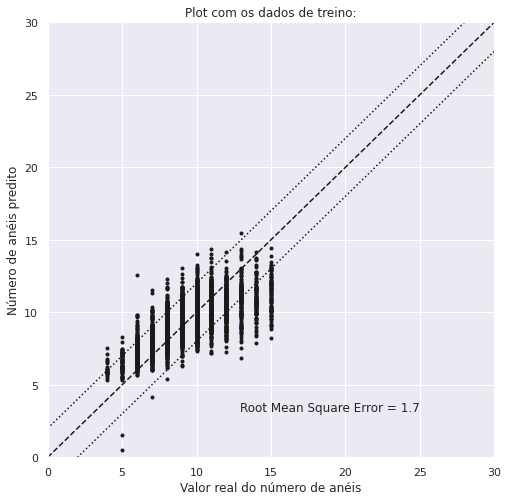

In [ ]:
#Com os dados de treino:
predito_treino_y = model.predict(X_train)
scatter_y(Y_train, predito_treino_y)
plt.title("Plot com os dados de treino:")


Text(0.5, 1.0, 'Plot com os dados de teste:')

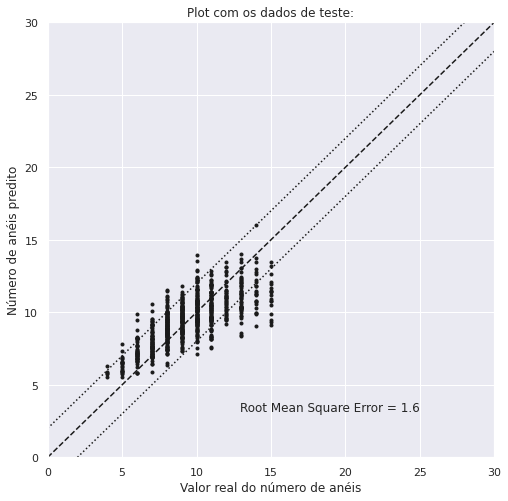

In [ ]:
predito_teste_y = model.predict(X_test)
scatter_y(Y_test, predito_teste_y)
plt.title("Plot com os dados de teste:")

# Questão 02

Iremos agora fazer uma regressão linear com base no modelo L2 (Ridge), e definimos o modelo a seguir:

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

diferenca = 0.1
valR2 = [] #valores de R²
valRMSE = [] #valores de rmse
lamb = [] #valores de lambda
alpha = diferenca

for i in range(1, 11): #são usados 10 folds
  Rid = Ridge(alpha = alpha) #modelo usado é o Ridge com variações de alpha
  lamb.append(alpha)
  RMSE = np.mean((-1*cross_val_score(Rid, X_train, Y_train, cv=10, scoring='neg_mean_squared_error'))**0.5)
  R2 = np.mean(cross_val_score(Rid, X_train, Y_train, cv=10, scoring='r2'))
  valR2.append(R2)
  valRMSE.append(RMSE)
  
  print('lambda:', alpha)
  print('Média de R²: ', R2)
  print('Média de RMSE: ', RMSE)
  alpha= alpha + diferenca
  print()

lambda: 0.1
Média de R²:  0.4874619007876637
Média de RMSE:  1.6583703471788165

lambda: 0.2
Média de R²:  0.48747120649257614
Média de RMSE:  1.6583554869006765

lambda: 0.30000000000000004
Média de R²:  0.4874799687874912
Média de RMSE:  1.6583414976521287

lambda: 0.4
Média de R²:  0.48748820260650644
Média de RMSE:  1.658328355592125

lambda: 0.5
Média de R²:  0.4874959224284333
Média de RMSE:  1.6583160376027695

lambda: 0.6
Média de R²:  0.4875031422924826
Média de RMSE:  1.6583045212645566

lambda: 0.7
Média de R²:  0.4875098758133437
Média de RMSE:  1.6582937848325643

lambda: 0.7999999999999999
Média de R²:  0.4875161361956776
Média de RMSE:  1.658283807213563

lambda: 0.8999999999999999
Média de R²:  0.48752193624805235
Média de RMSE:  1.6582745679439976

lambda: 0.9999999999999999
Média de R²:  0.48752728839634474
Média de RMSE:  1.6582660471688098



Text(0, 0.5, 'R²')

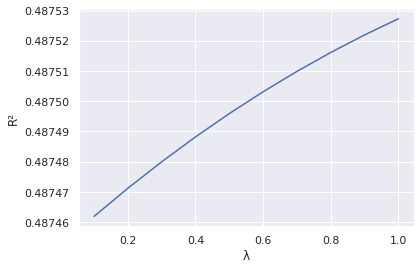

In [ ]:
plt.plot(lamb, valR2)
plt.xlabel('λ')
plt.ylabel('R²')

Text(0, 0.5, 'RMSE')

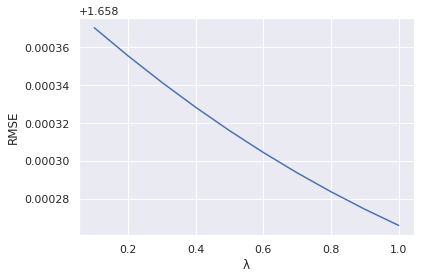

In [ ]:
plt.plot(lamb, valRMSE)
plt.xlabel('λ')
plt.ylabel('RMSE')

Ele pega o melhor alfa (λ) da grade de valores entre 0 e 1 com uma separação de 0,1.Como observado pelos plots, o valor ótimo de λ será, no caso, 1, pois é o valor em que o RMSE é menor e o R² é maior.

A seguir usa-se os dados de teste no modelo:

In [ ]:
Rid.fit(X_train, Y_train)
y_predito = Rid.predict(X_test)
R2 = r2_score(Y_test, y_predito)
RMSE = mean_squared_error(Y_test, y_pred,squared=False)
print('R2:', R2)
print('RMSE:', RMSE)

R2: 0.5398130502452981
RMSE: 1.5920600935181664


Os valores obtidos com os  valores de teste são próximos aos valores obtidos com os valores de treino, mas ainda são melhores, pois o valor de R² é maior e o de RMSE é menor.

# Questão 03

In [ ]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
#Definindos o preditor e as variáveis de resposta
X = tabela8[["Type", "LongestShell", "Diameter", "Height", "WholeWeight", "ShuckedWeight", "VisceraWeight", "ShellWeight"]]
y = tabela8[["Rings"]]

In [ ]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

In [ ]:
#Método de cross validation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
regr = LinearRegression()
mse=[]
rmseli = []
r2lis=[]

In [ ]:
#Calculando o MSE somente com o interceptor
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

In [ ]:
# Calculando o MSE usando cross-validation, adicionando um componente por vez
for i in np.arange(1, 9):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    score2 = model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='r2').mean()
    rmse = score**0.5
    rmseli.append(rmse)
    r2lis.append(score2)
    print('Número de componentes:', i)
    print('R²:', score2)
    print('RMSE:', rmse)
    print()



Número de componentes: 1
R²: 0.3550129483175688
RMSE: 1.866361335672905

Número de componentes: 2
R²: 0.3623165911644402
RMSE: 1.8556144638193182

Número de componentes: 3
R²: 0.4410160502078098
RMSE: 1.73697952880622

Número de componentes: 4
R²: 0.44090799276325154
RMSE: 1.737115917876598

Número de componentes: 5
R²: 0.4883462913991937
RMSE: 1.6618630993110615

Número de componentes: 6
R²: 0.490625754771756
RMSE: 1.6581531512283187

Número de componentes: 7
R²: 0.4910373346420526
RMSE: 1.6574786792398408

Número de componentes: 8
R²: 0.4974951145640516
RMSE: 1.6468509950687074



Plot dos resultados:


Text(0.5, 1.0, 'RMSE X Número de componentes')

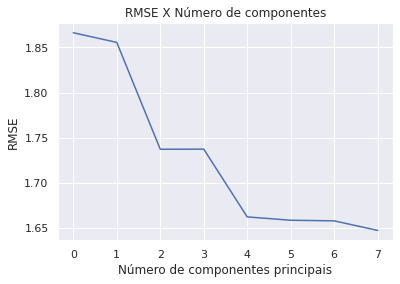

In [ ]:
# Plotando os resultados do cross-validation 
print('Plot dos resultados:')  
plt.plot(rmseli)
plt.xlabel('Número de componentes principais')
plt.ylabel('RMSE')
plt.title('RMSE X Número de componentes')

Plot dos resultados:


Text(0.5, 1.0, 'R² X Número de componentes')

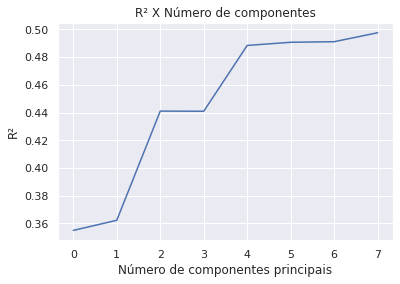

In [ ]:
# Plotando os resultados do cross-validation 
print('Plot dos resultados:')  
plt.plot(r2lis)
plt.xlabel('Número de componentes principais')
plt.ylabel('R²')
plt.title('R² X Número de componentes')

Vemos que o RMSE decresce e o R² cresce à medida que se aumenta o número de componentes, por isso, concluímos que o número ótimo é o de 8 componentes, ou seja, usando todos os componentes.

Agora iremos testar nosso modelo:

In [ ]:
#dividindo os dados em dados de treino (70%) e dados de teste (30%)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

In [ ]:
#Padronizando os dados
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:8]


In [ ]:
#Treinando o modelo PCR model com os dados de treino
regr = LinearRegression()
regr.fit(X_reduced_train[:,:8], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Calculando o RMSE e o R² com os dados de teste
pred = regr.predict(X_reduced_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)
print('RMSE:', rmse)
print('R²:', r2)


RMSE: 1.5892169501858608
R²: 0.5075327688683663
